<a href="https://colab.research.google.com/github/inseungkang/Kaggle/blob/master/myEMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.6MB/s 
     |████████████████████████████████| 358kB 14.6MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 1.0MB 10.2MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 2.6MB 24.8MB/s 
Mounted at /content/gdrive


In [17]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [31]:
import numpy as np
import pandas as pd
data_dir = '/content/gdrive/My Drive/ML Data/Kaggle Data/EMNIST/'
train_path = data_dir + 'emnist-mnist-train.csv'
test_path = data_dir + 'emnist-mnist-test.csv'

train_data = pd.read_csv(train_path, sep=",", header=None)
test_data = pd.read_csv(test_path, sep=",", header=None)

train_Y = train_data.iloc[:,0].values
train_X = np.reshape(train_data.iloc[:,1:].values, (60000, 28, 28))

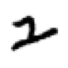

In [65]:
# print(tensor(arr))
df = pd.DataFrame(arr)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
show_image(df)